# Valorant Challengers Dataset Analysis

## Importing important libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading dataset into a dataframe

In [2]:
challengers = pd.read_json("dataset/vct-challengers.json")

In [3]:
challengers

,playerName,team,rating,region,playerStatistics,agent,playerCategory
0,Kouf,AMB,1.53,Americas,"{'average_combat_score': '298.0', 'kill_deaths...","[reyna, kayo]",vct-challengers
1,nelu,63,1.31,Americas,"{'average_combat_score': '266.7', 'kill_deaths...","[viper, sova, breach]",vct-challengers
2,welyy,Blue,1.31,Americas,"{'average_combat_score': '240.9', 'kill_deaths...","[sova, fade, breach]",vct-challengers
3,ShoT_UP,TOR,1.29,Americas,"{'average_combat_score': '240.2', 'kill_deaths...","[skye, astra, killjoy]",vct-challengers
4,mada,NRG,1.26,Americas,"{'average_combat_score': '268.8', 'kill_deaths...","[raze, jett, reyna]",vct-challengers
...,...,...,...,...,...,...,...
2049,ZaL,30,0.33,Pacific,"{'average_combat_score': '106.5', 'kill_deaths...",[viper],vct-challengers
2050,QuanTrọngLàTốcĐộ,35,0.29,Pacific,"{'average_combat_score': '101.5', 'kill_deaths...","[gekko, raze]",vct-challengers
2051,cara,PATH,0.27,Pacific,"{'average_combat_score': '103.0', 'kill_deaths...","[cypher, killjoy]",vct-challengers
2052,gogi,28,0.19,Pacific,"{'average_combat_score': '82.0', 'kill_deaths'...","[skye, killjoy]",vct-challengers


There is a problem in the data, the playerStatistics is a dict, we would need to flatten this.

In [4]:
challengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   playerName        2054 non-null   object
 1   team              2054 non-null   object
 2   rating            2054 non-null   object
 3   region            2054 non-null   object
 4   playerStatistics  2054 non-null   object
 5   agent             2054 non-null   object
 6   playerCategory    2054 non-null   object
dtypes: object(7)
memory usage: 112.5+ KB


In [5]:
challengers[challengers['playerName'] == "Kouf"]["playerStatistics"]

0    {'average_combat_score': '298.0', 'kill_deaths...
Name: playerStatistics, dtype: object

Flattening playerStatistics (splittling player statitics into multiple columns):

In [6]:
from pandas import json_normalize 
import json

In [7]:
# Load the JSON data from a file 
with open('dataset/vct-challengers.json') as file: 
    data = json.load(file) 
    
# Normalize each entry in the JSON data and combine them into a DataFrame 
df = pd.json_normalize(data)

In [8]:
df

,playerName,team,rating,region,agent,playerCategory,playerStatistics.average_combat_score,playerStatistics.kill_deaths,playerStatistics.kill_assists_survived_traded,playerStatistics.average_damage_per_round,playerStatistics.kills_per_round,playerStatistics.assists_per_round,playerStatistics.first_kills_per_round,playerStatistics.first_deaths_per_round,playerStatistics.headshot_percentage,playerStatistics.clutch_success_percentage
0,Kouf,AMB,1.53,Americas,"[reyna, kayo]",vct-challengers,298.0,1.48,74%,185.9,1.03,0.36,0.13,0.03,35%,15%
1,nelu,63,1.31,Americas,"[viper, sova, breach]",vct-challengers,266.7,1.15,75%,182.0,0.86,0.40,0.06,0.06,30%,21%
2,welyy,Blue,1.31,Americas,"[sova, fade, breach]",vct-challengers,240.9,1.26,74%,164.1,0.82,0.39,0.07,0.04,27%,10%
3,ShoT_UP,TOR,1.29,Americas,"[skye, astra, killjoy]",vct-challengers,240.2,1.25,78%,158.6,0.82,0.40,0.06,0.06,25%,25%
4,mada,NRG,1.26,Americas,"[raze, jett, reyna]",vct-challengers,268.8,1.34,76%,172.9,0.93,0.19,0.24,0.13,26%,11%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,ZaL,30,0.33,Pacific,[viper],vct-challengers,106.5,0.30,40%,68.1,0.27,0.17,0.07,0.13,27%,
2050,QuanTrọngLàTốcĐộ,35,0.29,Pacific,"[gekko, raze]",vct-challengers,101.5,0.27,37%,68.0,0.26,0.14,0.00,0.17,11%,17%
2051,cara,PATH,0.27,Pacific,"[cypher, killjoy]",vct-challengers,103.0,0.25,44%,72.9,0.24,0.29,0.06,0.15,11%,
2052,gogi,28,0.19,Pacific,"[skye, killjoy]",vct-challengers,82.0,0.18,36%,60.5,0.18,0.18,0.00,0.25,12%,


In [9]:
challengers = df

In [10]:
challengers

,playerName,team,rating,region,agent,playerCategory,playerStatistics.average_combat_score,playerStatistics.kill_deaths,playerStatistics.kill_assists_survived_traded,playerStatistics.average_damage_per_round,playerStatistics.kills_per_round,playerStatistics.assists_per_round,playerStatistics.first_kills_per_round,playerStatistics.first_deaths_per_round,playerStatistics.headshot_percentage,playerStatistics.clutch_success_percentage
0,Kouf,AMB,1.53,Americas,"[reyna, kayo]",vct-challengers,298.0,1.48,74%,185.9,1.03,0.36,0.13,0.03,35%,15%
1,nelu,63,1.31,Americas,"[viper, sova, breach]",vct-challengers,266.7,1.15,75%,182.0,0.86,0.40,0.06,0.06,30%,21%
2,welyy,Blue,1.31,Americas,"[sova, fade, breach]",vct-challengers,240.9,1.26,74%,164.1,0.82,0.39,0.07,0.04,27%,10%
3,ShoT_UP,TOR,1.29,Americas,"[skye, astra, killjoy]",vct-challengers,240.2,1.25,78%,158.6,0.82,0.40,0.06,0.06,25%,25%
4,mada,NRG,1.26,Americas,"[raze, jett, reyna]",vct-challengers,268.8,1.34,76%,172.9,0.93,0.19,0.24,0.13,26%,11%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,ZaL,30,0.33,Pacific,[viper],vct-challengers,106.5,0.30,40%,68.1,0.27,0.17,0.07,0.13,27%,
2050,QuanTrọngLàTốcĐộ,35,0.29,Pacific,"[gekko, raze]",vct-challengers,101.5,0.27,37%,68.0,0.26,0.14,0.00,0.17,11%,17%
2051,cara,PATH,0.27,Pacific,"[cypher, killjoy]",vct-challengers,103.0,0.25,44%,72.9,0.24,0.29,0.06,0.15,11%,
2052,gogi,28,0.19,Pacific,"[skye, killjoy]",vct-challengers,82.0,0.18,36%,60.5,0.18,0.18,0.00,0.25,12%,


In [11]:
challengers.columns

Index(['playerName', 'team', 'rating', 'region', 'agent', 'playerCategory',
       'playerStatistics.average_combat_score', 'playerStatistics.kill_deaths',
       'playerStatistics.kill_assists_survived_traded',
       'playerStatistics.average_damage_per_round',
       'playerStatistics.kills_per_round',
       'playerStatistics.assists_per_round',
       'playerStatistics.first_kills_per_round',
       'playerStatistics.first_deaths_per_round',
       'playerStatistics.headshot_percentage',
       'playerStatistics.clutch_success_percentage'],
      dtype='object')

Changing the column names of the challengers df

In [12]:
col_names = ['playerName', 'team', 'rating', 'region', 'agent', 'playerCategory',
       'Average_combat_score', 'Kill_death_ratio',
       'kill_assists_survived_traded',
       'average_damage_per_round',
       'kills_per_round',
       'assists_per_round',
       'first_kills_per_round',
       'first_deaths_per_round',
       'headshot_percentage',
       'clutch_success_percentage']

In [13]:
challengers.columns = col_names

In [14]:
challengers.columns

Index(['playerName', 'team', 'rating', 'region', 'agent', 'playerCategory',
       'Average_combat_score', 'Kill_death_ratio',
       'kill_assists_survived_traded', 'average_damage_per_round',
       'kills_per_round', 'assists_per_round', 'first_kills_per_round',
       'first_deaths_per_round', 'headshot_percentage',
       'clutch_success_percentage'],
      dtype='object')

In [15]:
challengers.head()

,playerName,team,rating,region,agent,playerCategory,Average_combat_score,Kill_death_ratio,kill_assists_survived_traded,average_damage_per_round,kills_per_round,assists_per_round,first_kills_per_round,first_deaths_per_round,headshot_percentage,clutch_success_percentage
0,Kouf,AMB,1.53,Americas,"[reyna, kayo]",vct-challengers,298.0,1.48,74%,185.9,1.03,0.36,0.13,0.03,35%,15%
1,nelu,63,1.31,Americas,"[viper, sova, breach]",vct-challengers,266.7,1.15,75%,182.0,0.86,0.40,0.06,0.06,30%,21%
2,welyy,Blue,1.31,Americas,"[sova, fade, breach]",vct-challengers,240.9,1.26,74%,164.1,0.82,0.39,0.07,0.04,27%,10%
3,ShoT_UP,TOR,1.29,Americas,"[skye, astra, killjoy]",vct-challengers,240.2,1.25,78%,158.6,0.82,0.40,0.06,0.06,25%,25%
4,mada,NRG,1.26,Americas,"[raze, jett, reyna]",vct-challengers,268.8,1.34,76%,172.9,0.93,0.19,0.24,0.13,26%,11%


In [44]:
challengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   playerName                    2054 non-null   object 
 1   team                          2054 non-null   object 
 2   rating                        2006 non-null   object 
 3   region                        2054 non-null   object 
 4   agent                         2054 non-null   object 
 5   playerCategory                2054 non-null   object 
 6   Average_combat_score          2054 non-null   object 
 7   Kill_death_ratio              2054 non-null   object 
 8   kill_assists_survived_traded  2006 non-null   float64
 9   average_damage_per_round      2054 non-null   object 
 10  kills_per_round               2054 non-null   object 
 11  assists_per_round             2054 non-null   object 
 12  first_kills_per_round         2054 non-null   object 
 13  fir

All are object type. But we need to convert cols like KD ratio, KDA, etc. to numbers.

In [17]:
percent_cols = ['Kill_death_ratio', 'headshot_percentage', 'clutch_success_percentage']

In [21]:
percent_cols.append('kill_assists_survived_traded')

In [23]:
percent_cols.pop(0)

'Kill_death_ratio'

In [43]:
challengers.head()

,playerName,team,rating,region,agent,playerCategory,Average_combat_score,Kill_death_ratio,kill_assists_survived_traded,average_damage_per_round,kills_per_round,assists_per_round,first_kills_per_round,first_deaths_per_round,headshot_percentage,clutch_success_percentage
0,Kouf,AMB,1.53,Americas,"[reyna, kayo]",vct-challengers,298.0,1.48,0.74,185.9,1.03,0.36,0.13,0.03,0.35,0.15
1,nelu,63,1.31,Americas,"[viper, sova, breach]",vct-challengers,266.7,1.15,0.75,182.0,0.86,0.40,0.06,0.06,0.30,0.21
2,welyy,Blue,1.31,Americas,"[sova, fade, breach]",vct-challengers,240.9,1.26,0.74,164.1,0.82,0.39,0.07,0.04,0.27,0.10
3,ShoT_UP,TOR,1.29,Americas,"[skye, astra, killjoy]",vct-challengers,240.2,1.25,0.78,158.6,0.82,0.40,0.06,0.06,0.25,0.25
4,mada,NRG,1.26,Americas,"[raze, jett, reyna]",vct-challengers,268.8,1.34,0.76,172.9,0.93,0.19,0.24,0.13,0.26,0.11


In [36]:
def remove_percentage_sign(x): 
    return float(x.strip('%')) / 100 if isinstance(x, str) else x

In [39]:
challengers["kill_assists_survived_traded"] = challengers["kill_assists_survived_traded"].apply(remove_percentage_sign)

In [41]:
challengers["headshot_percentage"] = challengers["headshot_percentage"].apply(remove_percentage_sign)

In [42]:
challengers["clutch_success_percentage"] = challengers["clutch_success_percentage"].apply(remove_percentage_sign)

In [46]:
challengers.head()

,playerName,team,rating,region,agent,playerCategory,Average_combat_score,Kill_death_ratio,kill_assists_survived_traded,average_damage_per_round,kills_per_round,assists_per_round,first_kills_per_round,first_deaths_per_round,headshot_percentage,clutch_success_percentage
0,Kouf,AMB,1.53,Americas,"[reyna, kayo]",vct-challengers,298.0,1.48,0.74,185.9,1.03,0.36,0.13,0.03,0.35,0.15
1,nelu,63,1.31,Americas,"[viper, sova, breach]",vct-challengers,266.7,1.15,0.75,182.0,0.86,0.40,0.06,0.06,0.30,0.21
2,welyy,Blue,1.31,Americas,"[sova, fade, breach]",vct-challengers,240.9,1.26,0.74,164.1,0.82,0.39,0.07,0.04,0.27,0.10
3,ShoT_UP,TOR,1.29,Americas,"[skye, astra, killjoy]",vct-challengers,240.2,1.25,0.78,158.6,0.82,0.40,0.06,0.06,0.25,0.25
4,mada,NRG,1.26,Americas,"[raze, jett, reyna]",vct-challengers,268.8,1.34,0.76,172.9,0.93,0.19,0.24,0.13,0.26,0.11


In [47]:
num_cols = ["rating", "Average_combat_score", "Kill_death_ratio", "average_damage_per_round", "kills_per_round", "assists_per_round", "first_kills_per_round", "first_deaths_per_round"]

In [50]:
for col in num_cols:
    challengers[col] = challengers[col].astype("float")

In [51]:
challengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   playerName                    2054 non-null   object 
 1   team                          2054 non-null   object 
 2   rating                        2006 non-null   float64
 3   region                        2054 non-null   object 
 4   agent                         2054 non-null   object 
 5   playerCategory                2054 non-null   object 
 6   Average_combat_score          2054 non-null   float64
 7   Kill_death_ratio              2054 non-null   float64
 8   kill_assists_survived_traded  2006 non-null   float64
 9   average_damage_per_round      2054 non-null   float64
 10  kills_per_round               2054 non-null   float64
 11  assists_per_round             2054 non-null   float64
 12  first_kills_per_round         2054 non-null   float64
 13  fir

In [52]:
challengers.describe(include="all")

,playerName,team,rating,region,agent,playerCategory,Average_combat_score,Kill_death_ratio,kill_assists_survived_traded,average_damage_per_round,kills_per_round,assists_per_round,first_kills_per_round,first_deaths_per_round,headshot_percentage,clutch_success_percentage
count,2054,2054,2006.000000,2054,2054,2054,2054.000000,2054.000000,2006.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2006.000000,1476.000000
unique,2032,672,NaN,4,902,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Zeus,33,NaN,EMEA,"[raze, jett]",vct-challengers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,33,NaN,742,59,2054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.875857,NaN,NaN,NaN,184.104576,0.848092,0.657542,122.318160,0.637600,0.252731,0.089318,0.109927,0.275673,0.156843
std,NaN,NaN,0.199401,NaN,NaN,NaN,35.718386,0.225501,0.081953,23.070157,0.135798,0.103409,0.052457,0.056717,0.064152,0.083984
min,NaN,NaN,0.140000,NaN,NaN,NaN,61.500000,0.140000,0.300000,37.200000,0.140000,0.030000,0.000000,0.000000,0.070000,0.020000
25%,NaN,NaN,0.770000,NaN,NaN,NaN,163.650000,0.700000,0.620000,108.900000,0.560000,0.180000,0.060000,0.070000,0.230000,0.100000
50%,NaN,NaN,0.900000,NaN,NaN,NaN,184.800000,0.850000,0.670000,122.800000,0.640000,0.240000,0.080000,0.100000,0.270000,0.140000
75%,NaN,NaN,1.010000,NaN,NaN,NaN,206.675000,1.000000,0.710000,137.000000,0.720000,0.330000,0.110000,0.140000,0.310000,0.180000


In [53]:
challengers.columns

Index(['playerName', 'team', 'rating', 'region', 'agent', 'playerCategory',
       'Average_combat_score', 'Kill_death_ratio',
       'kill_assists_survived_traded', 'average_damage_per_round',
       'kills_per_round', 'assists_per_round', 'first_kills_per_round',
       'first_deaths_per_round', 'headshot_percentage',
       'clutch_success_percentage'],
      dtype='object')

In [56]:
challengers["playerName"].value_counts()

playerName
Zeus       3
Bob        3
Core       2
Panda      2
f1cio      2
          ..
NeFi       1
neptuNo    1
Jady       1
keloqz     1
FUZE       1
Name: count, Length: 2032, dtype: int64

In [62]:
len(challengers["team"].unique())

672

There are 672 Unique teams.

In [63]:
challengers["region"].value_counts()

region
EMEA        742
Pacific     701
Americas    563
China        48
Name: count, dtype: int64

EMEA is the most popular region in this dataset.

In [64]:
challengers["playerCategory"].value_counts()

playerCategory
vct-challengers    2054
Name: count, dtype: int64

In [65]:
challengers["agent"].value_counts()

agent
[raze, jett]               59
[omen]                     52
[cypher, killjoy]          35
[jett, raze]               34
[killjoy, cypher]          34
                           ..
[phoenix, breach, omen]     1
[sova, chamber]             1
[omen, viper, clove]        1
[skye, gekko, omen]         1
[gekko, raze]               1
Name: count, Length: 902, dtype: int64

From this, we can say that the most popular agents used are the pair of raze and jett. The next most popular agent is omen.

In [72]:
agents = [ "Brimstone", "Phoenix", "Sage", "Sova", "Viper", "Cypher", "Reyna", "Killjoy", "Breach", "Omen", "Jett", "Raze", "Skye", "Yoru", "Astra", "KAY/O", "Chamber", "Neon", "Fade", "Harbor", "Gekko", "Deadlock", "Iso", "Clove", "Vyse"]

In [77]:
agents = [agent.lower() for agent in agents]

In [78]:
agents

['brimstone',
 'phoenix',
 'sage',
 'sova',
 'viper',
 'cypher',
 'reyna',
 'killjoy',
 'breach',
 'omen',
 'jett',
 'raze',
 'skye',
 'yoru',
 'astra',
 'kay/o',
 'chamber',
 'neon',
 'fade',
 'harbor',
 'gekko',
 'deadlock',
 'iso',
 'clove',
 'vyse']

In [79]:
agents_dict = {}

for agent in agents:
    agents_dict[agent] = 0

In [86]:
agents_dict

{'brimstone': 0,
 'phoenix': 0,
 'sage': 0,
 'sova': 0,
 'viper': 0,
 'cypher': 0,
 'reyna': 1,
 'killjoy': 0,
 'breach': 0,
 'omen': 0,
 'jett': 0,
 'raze': 0,
 'skye': 0,
 'yoru': 0,
 'astra': 0,
 'chamber': 0,
 'neon': 0,
 'fade': 0,
 'harbor': 0,
 'gekko': 0,
 'deadlock': 0,
 'iso': 0,
 'clove': 0,
 'vyse': 0,
 'kayo': 0}

In [83]:
del agents_dict["kay/o"]

In [85]:
agents_dict["kayo"] = 0

In [87]:
for agent_list in challengers["agent"]:
    for agent in agent_list:
        agents_dict[agent.lower()] += 1


In [90]:
agents_dict

{'brimstone': 175,
 'phoenix': 29,
 'sage': 76,
 'sova': 402,
 'viper': 489,
 'cypher': 397,
 'reyna': 95,
 'killjoy': 430,
 'breach': 244,
 'omen': 519,
 'jett': 388,
 'raze': 403,
 'skye': 310,
 'yoru': 91,
 'astra': 82,
 'chamber': 58,
 'neon': 79,
 'fade': 148,
 'harbor': 67,
 'gekko': 207,
 'deadlock': 32,
 'iso': 15,
 'clove': 16,
 'vyse': 1,
 'kayo': 263}

In [93]:
agents_dict.keys()

dict_keys(['brimstone', 'phoenix', 'sage', 'sova', 'viper', 'cypher', 'reyna', 'killjoy', 'breach', 'omen', 'jett', 'raze', 'skye', 'yoru', 'astra', 'chamber', 'neon', 'fade', 'harbor', 'gekko', 'deadlock', 'iso', 'clove', 'vyse', 'kayo'])

In [94]:
max(agents_dict, key=agents_dict.get)

'omen'

This proves that the most used agent is Omen.

In [95]:
sorted(agents_dict.items(), key=lambda item: item[1])

[('vyse', 1),
 ('iso', 15),
 ('clove', 16),
 ('phoenix', 29),
 ('deadlock', 32),
 ('chamber', 58),
 ('harbor', 67),
 ('sage', 76),
 ('neon', 79),
 ('astra', 82),
 ('yoru', 91),
 ('reyna', 95),
 ('fade', 148),
 ('brimstone', 175),
 ('gekko', 207),
 ('breach', 244),
 ('kayo', 263),
 ('skye', 310),
 ('jett', 388),
 ('cypher', 397),
 ('sova', 402),
 ('raze', 403),
 ('killjoy', 430),
 ('viper', 489),
 ('omen', 519)]

This shows that: Omen, Viper and KJ are the most used agents.<br>
And, vyse, iso, clove are the least used agents.

Now, lets look at missing values. and fill them

In [96]:
challengers.isna().sum()

playerName                        0
team                              0
rating                           48
region                            0
agent                             0
playerCategory                    0
Average_combat_score              0
Kill_death_ratio                  0
kill_assists_survived_traded     48
average_damage_per_round          0
kills_per_round                   0
assists_per_round                 0
first_kills_per_round             0
first_deaths_per_round            0
headshot_percentage              48
clutch_success_percentage       578
dtype: int64

In [97]:
challengers.describe()

,rating,Average_combat_score,Kill_death_ratio,kill_assists_survived_traded,average_damage_per_round,kills_per_round,assists_per_round,first_kills_per_round,first_deaths_per_round,headshot_percentage,clutch_success_percentage
count,2006.000000,2054.000000,2054.000000,2006.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2006.000000,1476.000000
mean,0.875857,184.104576,0.848092,0.657542,122.318160,0.637600,0.252731,0.089318,0.109927,0.275673,0.156843
std,0.199401,35.718386,0.225501,0.081953,23.070157,0.135798,0.103409,0.052457,0.056717,0.064152,0.083984
min,0.140000,61.500000,0.140000,0.300000,37.200000,0.140000,0.030000,0.000000,0.000000,0.070000,0.020000
25%,0.770000,163.650000,0.700000,0.620000,108.900000,0.560000,0.180000,0.060000,0.070000,0.230000,0.100000
50%,0.900000,184.800000,0.850000,0.670000,122.800000,0.640000,0.240000,0.080000,0.100000,0.270000,0.140000
75%,1.010000,206.675000,1.000000,0.710000,137.000000,0.720000,0.330000,0.110000,0.140000,0.310000,0.180000
max,1.580000,342.000000,1.960000,0.900000,211.400000,1.240000,0.720000,0.450000,0.490000,0.590000,1.000000


(array([ 14.,  45.,  95., 232., 435., 666., 399., 102.,  15.,   3.]),
 array([0.14 , 0.284, 0.428, 0.572, 0.716, 0.86 , 1.004, 1.148, 1.292,
        1.436, 1.58 ]),
 <BarContainer object of 10 artists>)

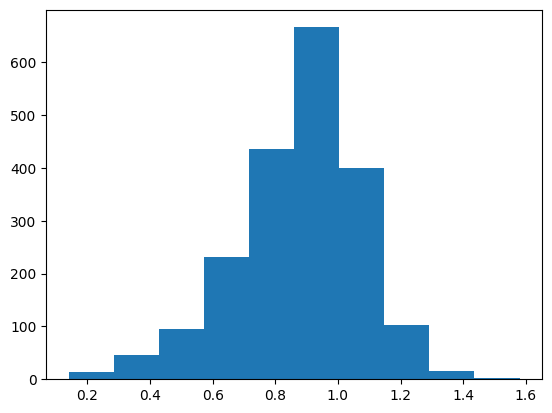

In [100]:
plt.hist(challengers["rating"])

In [101]:
challengers[challengers["rating"].isna()]

,playerName,team,rating,region,agent,playerCategory,Average_combat_score,Kill_death_ratio,kill_assists_survived_traded,average_damage_per_round,kills_per_round,assists_per_round,first_kills_per_round,first_deaths_per_round,headshot_percentage,clutch_success_percentage
1305,Yaobaike,65,NaN,China,"[jett, omen]",vct-challengers,199.0,0.86,NaN,51.9,0.65,0.18,0.03,0.02,NaN,NaN
1306,huNter,ALG,NaN,China,[omen],vct-challengers,116.5,0.32,NaN,76.3,0.29,0.46,0.06,0.14,NaN,NaN
1307,f1cio,ZYG,NaN,China,"[omen, killjoy]",vct-challengers,169.2,0.83,NaN,107.7,0.61,0.31,0.09,0.05,NaN,NaN
1308,FFs,ZYG,NaN,China,"[sova, harbor]",vct-challengers,129.0,0.62,NaN,88.7,0.44,0.35,0.03,0.07,NaN,NaN
1309,slowly,ZYG,NaN,China,"[yoru, omen]",vct-challengers,280.8,1.54,NaN,172.3,1.04,0.16,0.20,0.12,NaN,NaN
1310,B1SK,ZYG,NaN,China,"[neon, jett]",vct-challengers,235.0,1.08,NaN,148.2,0.78,0.14,0.15,0.21,NaN,NaN
1311,QiuYe,XG,NaN,China,[cypher],vct-challengers,232.3,1.24,NaN,147.1,0.84,0.26,0.10,0.08,NaN,NaN
1312,Core,XG,NaN,China,[breach],vct-challengers,192.7,0.93,NaN,127.9,0.69,0.39,0.02,0.07,NaN,NaN
1313,5CM,XG,NaN,China,[neon],vct-challengers,189.7,0.64,NaN,126.4,0.59,0.26,0.18,0.16,NaN,NaN
1314,waituu,XG,NaN,China,"[brimstone, omen]",vct-challengers,191.7,0.89,NaN,122.8,0.69,0.38,0.08,0.20,NaN,NaN


In [102]:
challengers[challengers["kill_assists_survived_traded"].isna()]

,playerName,team,rating,region,agent,playerCategory,Average_combat_score,Kill_death_ratio,kill_assists_survived_traded,average_damage_per_round,kills_per_round,assists_per_round,first_kills_per_round,first_deaths_per_round,headshot_percentage,clutch_success_percentage
1305,Yaobaike,65,NaN,China,"[jett, omen]",vct-challengers,199.0,0.86,NaN,51.9,0.65,0.18,0.03,0.02,NaN,NaN
1306,huNter,ALG,NaN,China,[omen],vct-challengers,116.5,0.32,NaN,76.3,0.29,0.46,0.06,0.14,NaN,NaN
1307,f1cio,ZYG,NaN,China,"[omen, killjoy]",vct-challengers,169.2,0.83,NaN,107.7,0.61,0.31,0.09,0.05,NaN,NaN
1308,FFs,ZYG,NaN,China,"[sova, harbor]",vct-challengers,129.0,0.62,NaN,88.7,0.44,0.35,0.03,0.07,NaN,NaN
1309,slowly,ZYG,NaN,China,"[yoru, omen]",vct-challengers,280.8,1.54,NaN,172.3,1.04,0.16,0.20,0.12,NaN,NaN
1310,B1SK,ZYG,NaN,China,"[neon, jett]",vct-challengers,235.0,1.08,NaN,148.2,0.78,0.14,0.15,0.21,NaN,NaN
1311,QiuYe,XG,NaN,China,[cypher],vct-challengers,232.3,1.24,NaN,147.1,0.84,0.26,0.10,0.08,NaN,NaN
1312,Core,XG,NaN,China,[breach],vct-challengers,192.7,0.93,NaN,127.9,0.69,0.39,0.02,0.07,NaN,NaN
1313,5CM,XG,NaN,China,[neon],vct-challengers,189.7,0.64,NaN,126.4,0.59,0.26,0.18,0.16,NaN,NaN
1314,waituu,XG,NaN,China,"[brimstone, omen]",vct-challengers,191.7,0.89,NaN,122.8,0.69,0.38,0.08,0.20,NaN,NaN


In [103]:
challengers[challengers["headshot_percentage"].isna()]

,playerName,team,rating,region,agent,playerCategory,Average_combat_score,Kill_death_ratio,kill_assists_survived_traded,average_damage_per_round,kills_per_round,assists_per_round,first_kills_per_round,first_deaths_per_round,headshot_percentage,clutch_success_percentage
1305,Yaobaike,65,NaN,China,"[jett, omen]",vct-challengers,199.0,0.86,NaN,51.9,0.65,0.18,0.03,0.02,NaN,NaN
1306,huNter,ALG,NaN,China,[omen],vct-challengers,116.5,0.32,NaN,76.3,0.29,0.46,0.06,0.14,NaN,NaN
1307,f1cio,ZYG,NaN,China,"[omen, killjoy]",vct-challengers,169.2,0.83,NaN,107.7,0.61,0.31,0.09,0.05,NaN,NaN
1308,FFs,ZYG,NaN,China,"[sova, harbor]",vct-challengers,129.0,0.62,NaN,88.7,0.44,0.35,0.03,0.07,NaN,NaN
1309,slowly,ZYG,NaN,China,"[yoru, omen]",vct-challengers,280.8,1.54,NaN,172.3,1.04,0.16,0.20,0.12,NaN,NaN
1310,B1SK,ZYG,NaN,China,"[neon, jett]",vct-challengers,235.0,1.08,NaN,148.2,0.78,0.14,0.15,0.21,NaN,NaN
1311,QiuYe,XG,NaN,China,[cypher],vct-challengers,232.3,1.24,NaN,147.1,0.84,0.26,0.10,0.08,NaN,NaN
1312,Core,XG,NaN,China,[breach],vct-challengers,192.7,0.93,NaN,127.9,0.69,0.39,0.02,0.07,NaN,NaN
1313,5CM,XG,NaN,China,[neon],vct-challengers,189.7,0.64,NaN,126.4,0.59,0.26,0.18,0.16,NaN,NaN
1314,waituu,XG,NaN,China,"[brimstone, omen]",vct-challengers,191.7,0.89,NaN,122.8,0.69,0.38,0.08,0.20,NaN,NaN


In [107]:
challengers[challengers["clutch_success_percentage"].isna()]

,playerName,team,rating,region,agent,playerCategory,Average_combat_score,Kill_death_ratio,kill_assists_survived_traded,average_damage_per_round,kills_per_round,assists_per_round,first_kills_per_round,first_deaths_per_round,headshot_percentage,clutch_success_percentage
10,kajsiab,43,1.22,Americas,[sova],vct-challengers,230.0,1.00,0.67,166.8,0.72,0.26,0.09,0.05,0.42,NaN
17,Shondex,Blue,1.20,Americas,"[cypher, viper]",vct-challengers,232.5,1.52,0.71,151.2,0.91,0.22,0.11,0.09,0.36,NaN
30,Melvin,UCSD,1.15,Americas,[jett],vct-challengers,275.5,1.15,0.65,174.9,0.91,0.12,0.09,0.15,0.38,NaN
35,collin,38,1.14,Americas,"[jett, raze]",vct-challengers,278.5,1.16,0.71,180.6,0.95,0.21,0.26,0.08,0.38,NaN
38,Timotino,ROSE,1.14,Americas,"[raze, harbor, jett]",vct-challengers,236.7,1.05,0.71,160.1,0.82,0.18,0.09,0.13,0.30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,hyun,28,0.35,Pacific,"[killjoy, omen]",vct-challengers,100.5,0.33,0.39,71.5,0.32,0.11,0.00,0.07,0.27,NaN
2049,ZaL,30,0.33,Pacific,[viper],vct-challengers,106.5,0.30,0.40,68.1,0.27,0.17,0.07,0.13,0.27,NaN
2051,cara,PATH,0.27,Pacific,"[cypher, killjoy]",vct-challengers,103.0,0.25,0.44,72.9,0.24,0.29,0.06,0.15,0.11,NaN
2052,gogi,28,0.19,Pacific,"[skye, killjoy]",vct-challengers,82.0,0.18,0.36,60.5,0.18,0.18,0.00,0.25,0.12,NaN


Except for cluth_success_percentage, all other cols with missing values are from the china region

Let's see their distribution

(array([ 18.,  72., 324., 628., 577., 284.,  74.,  22.,   5.,   2.]),
 array([0.07 , 0.122, 0.174, 0.226, 0.278, 0.33 , 0.382, 0.434, 0.486,
        0.538, 0.59 ]),
 <BarContainer object of 10 artists>)

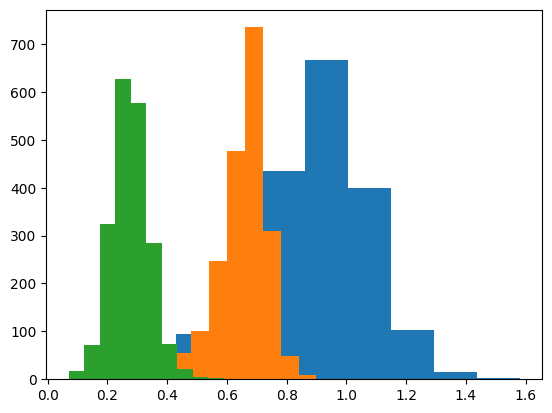

In [108]:
plt.hist(challengers["rating"])
plt.hist(challengers["kill_assists_survived_traded"])
plt.hist(challengers["headshot_percentage"])

All seem to be close to a normal distribution. Thus, filling the null values with the mean is a good idea here.

In [110]:
# df[['col1', 'col2']] = df[['col1', 'col2']].fillna(df[['col1', 'col2']].mean())

challengers[["rating", "kill_assists_survived_traded", "headshot_percentage"]] = challengers[["rating", "kill_assists_survived_traded", "headshot_percentage"]].fillna(challengers[["rating", "kill_assists_survived_traded", "headshot_percentage"]].mean())

In [115]:
challengers.isna().sum()

playerName                      0
team                            0
rating                          0
region                          0
agent                           0
playerCategory                  0
Average_combat_score            0
Kill_death_ratio                0
kill_assists_survived_traded    0
average_damage_per_round        0
kills_per_round                 0
assists_per_round               0
first_kills_per_round           0
first_deaths_per_round          0
headshot_percentage             0
clutch_success_percentage       0
dtype: int64

The only col with null values is clutch percent

(array([485., 758., 152.,  57.,  21.,   0.,   2.,   0.,   0.,   1.]),
 array([0.02 , 0.118, 0.216, 0.314, 0.412, 0.51 , 0.608, 0.706, 0.804,
        0.902, 1.   ]),
 <BarContainer object of 10 artists>)

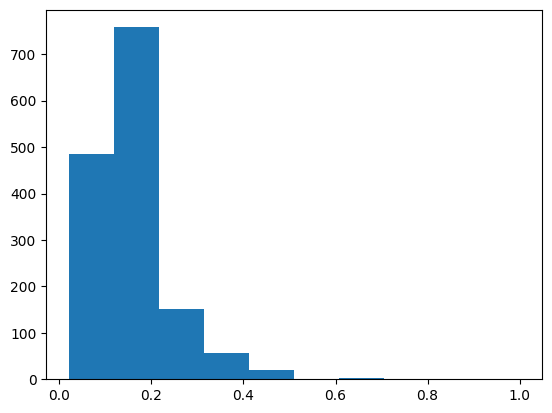

In [113]:
plt.hist(challengers["clutch_success_percentage"])

In [114]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[['clutch_success_percentage']] = imputer.fit_transform(df[['clutch_success_percentage']])

(array([ 15.,  35.,  97., 138., 200., 182., 775., 183., 102.,  94.,  44.,
         68.,  16.,  18.,   6.,  35.,   1.,   3.,   5.,  13.,   2.,   1.,
          0.,   0.,  18.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.02  , 0.0396, 0.0592, 0.0788, 0.0984, 0.118 , 0.1376, 0.1572,
        0.1768, 0.1964, 0.216 , 0.2356, 0.2552, 0.2748, 0.2944, 0.314 ,
        0.3336, 0.3532, 0.3728, 0.3924, 0.412 , 0.4316, 0.4512, 0.4708,
        0.4904, 0.51  , 0.5296, 0.5492, 0.5688, 0.5884, 0.608 , 0.6276,
        0.6472, 0.6668, 0.6864, 0.706 , 0.7256, 0.7452, 0.7648, 0.7844,
        0.804 , 0.8236, 0.8432, 0.8628, 0.8824, 0.902 , 0.9216, 0.9412,
        0.9608, 0.9804, 1.    ]),
 <BarContainer object of 50 artists>)

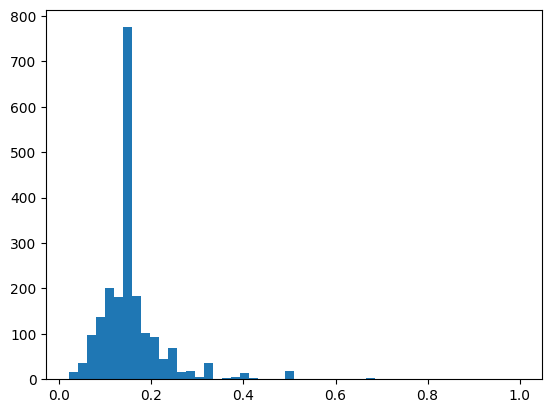

In [117]:
plt.hist(challengers["clutch_success_percentage"], bins=50)

Looks like the missing values were filled by median

In [118]:
challengers["clutch_success_percentage"].describe()

count    2054.000000
mean        0.156843
std         0.071187
min         0.020000
25%         0.120000
50%         0.156843
75%         0.170000
max         1.000000
Name: clutch_success_percentage, dtype: float64

In [120]:
challengers[challengers["clutch_success_percentage"] == 1]

,playerName,team,rating,region,agent,playerCategory,Average_combat_score,Kill_death_ratio,kill_assists_survived_traded,average_damage_per_round,kills_per_round,assists_per_round,first_kills_per_round,first_deaths_per_round,headshot_percentage,clutch_success_percentage
293,novacaine,Six,0.85,Americas,[jett],vct-challengers,228.0,0.88,0.65,140.5,0.73,0.26,0.18,0.16,0.22,1.0


Player name "novacaine" has perfect successful clutch percent. Meaning he/she has clutched the game for a win everytime. 

Let's find the top 10% players, according to the ratings:

In [125]:
rating_threshold = challengers["rating"].quantile(0.99)

In [127]:
top_1_rated = challengers[challengers["rating"] >= rating_threshold]

In [128]:
len(top_1_rated)

22

There are 22 players in the top 1%, according to the rating.

In [131]:
top_1_rated

,playerName,team,rating,region,agent,playerCategory,Average_combat_score,Kill_death_ratio,kill_assists_survived_traded,average_damage_per_round,kills_per_round,assists_per_round,first_kills_per_round,first_deaths_per_round,headshot_percentage,clutch_success_percentage
0,Kouf,AMB,1.53,Americas,"[reyna, kayo]",vct-challengers,298.0,1.48,0.74,185.9,1.03,0.36,0.13,0.03,0.35,0.150000
1,nelu,63,1.31,Americas,"[viper, sova, breach]",vct-challengers,266.7,1.15,0.75,182.0,0.86,0.40,0.06,0.06,0.30,0.210000
2,welyy,Blue,1.31,Americas,"[sova, fade, breach]",vct-challengers,240.9,1.26,0.74,164.1,0.82,0.39,0.07,0.04,0.27,0.100000
3,ShoT_UP,TOR,1.29,Americas,"[skye, astra, killjoy]",vct-challengers,240.2,1.25,0.78,158.6,0.82,0.40,0.06,0.06,0.25,0.250000
563,rivo,36,1.33,EMEA,[cypher],vct-challengers,245.5,1.27,0.75,167.9,0.92,0.17,0.06,0.03,0.23,0.210000
564,purp0,GX,1.31,EMEA,"[sova, skye]",vct-challengers,258.0,1.55,0.83,165.4,0.92,0.19,0.03,0.11,0.33,0.330000
565,kaajak,APK,1.31,EMEA,"[yoru, neon, jett]",vct-challengers,273.9,1.50,0.75,174.1,1.00,0.17,0.23,0.14,0.39,0.150000
566,Fezisss,RBT,1.28,EMEA,"[astra, cypher]",vct-challengers,234.3,1.35,0.76,153.9,0.83,0.39,0.13,0.07,0.30,0.250000
1353,Confident,peeker,1.58,Pacific,[raze],vct-challengers,342.0,1.96,0.87,211.4,1.24,0.13,0.45,0.13,0.21,0.156843
1354,consz,MGLZ,1.57,Pacific,"[iso, yoru]",vct-challengers,297.0,1.84,0.85,200.4,1.15,0.33,0.20,0.15,0.40,0.156843


The player "Kouf" is the higest rated player in the whole dataset.

Let look at other stats for the top 1% players:

In [136]:
top_1_rated["team"].value_counts()

team
58        3
MGLZ      2
DOM       1
Whoo      1
LESS      1
PATH      1
Jai       1
20        1
38        1
AMB       1
63        1
peeker    1
RBT       1
APK       1
GX        1
36        1
TOR       1
Blue      1
AST       1
Name: count, dtype: int64

There are 3 members from the team "58", and 2 members from the team "MGLZ" in the top 1% rated players.

In [137]:
top_1_rated["region"].value_counts()

region
Pacific     14
Americas     4
EMEA         4
Name: count, dtype: int64

Most of the top 1% rated players are from Pacific region.

In [138]:
top_1_agents_dict = {}

for agent in agents:
    top_1_agents_dict[agent] = 0

In [143]:
for agent_list in top_1_rated["agent"]:
    for agent in agent_list:
        top_1_agents_dict[agent.lower()] += 1


In [144]:
top_1_agents_dict

{'brimstone': 3,
 'phoenix': 0,
 'sage': 0,
 'sova': 6,
 'viper': 2,
 'cypher': 4,
 'reyna': 3,
 'killjoy': 6,
 'breach': 3,
 'omen': 3,
 'jett': 1,
 'raze': 1,
 'skye': 2,
 'yoru': 3,
 'astra': 2,
 'chamber': 2,
 'neon': 1,
 'fade': 2,
 'harbor': 0,
 'gekko': 1,
 'deadlock': 0,
 'iso': 1,
 'clove': 0,
 'vyse': 0,
 'kayo': 3}

In [146]:
max(top_1_agents_dict, key = top_1_agents_dict.get)

'sova'

In [148]:
sorted(top_1_agents_dict.items(), key=lambda item: item[1])

[('phoenix', 0),
 ('sage', 0),
 ('harbor', 0),
 ('deadlock', 0),
 ('clove', 0),
 ('vyse', 0),
 ('jett', 1),
 ('raze', 1),
 ('neon', 1),
 ('gekko', 1),
 ('iso', 1),
 ('viper', 2),
 ('skye', 2),
 ('astra', 2),
 ('chamber', 2),
 ('fade', 2),
 ('brimstone', 3),
 ('reyna', 3),
 ('breach', 3),
 ('omen', 3),
 ('yoru', 3),
 ('kayo', 3),
 ('cypher', 4),
 ('sova', 6),
 ('killjoy', 6)]

This shows that the top 1% players use KJ and Sova the most. And agents like Pheonix, Sage, Harbor, Deadlock, Clove, Vyse see no play time in challengers.

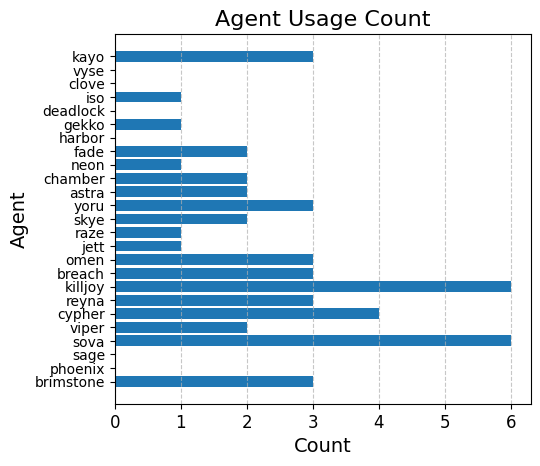

In [172]:
plt.barh(list(top_1_agents_dict.keys()), list(top_1_agents_dict.values()))
plt.subplots_adjust(left=0.25) 
plt.xlabel('Count', fontsize=14) 
plt.ylabel('Agent', fontsize=14) 
plt.title('Agent Usage Count', fontsize=16) 
plt.yticks(fontsize=10) 
plt.xticks(fontsize=12) 

# Add grid lines for better visualization 
plt.grid(axis='x', linestyle='--', alpha=0.7)

In [173]:
top_1_rated

,playerName,team,rating,region,agent,playerCategory,Average_combat_score,Kill_death_ratio,kill_assists_survived_traded,average_damage_per_round,kills_per_round,assists_per_round,first_kills_per_round,first_deaths_per_round,headshot_percentage,clutch_success_percentage
0,Kouf,AMB,1.53,Americas,"[reyna, kayo]",vct-challengers,298.0,1.48,0.74,185.9,1.03,0.36,0.13,0.03,0.35,0.150000
1,nelu,63,1.31,Americas,"[viper, sova, breach]",vct-challengers,266.7,1.15,0.75,182.0,0.86,0.40,0.06,0.06,0.30,0.210000
2,welyy,Blue,1.31,Americas,"[sova, fade, breach]",vct-challengers,240.9,1.26,0.74,164.1,0.82,0.39,0.07,0.04,0.27,0.100000
3,ShoT_UP,TOR,1.29,Americas,"[skye, astra, killjoy]",vct-challengers,240.2,1.25,0.78,158.6,0.82,0.40,0.06,0.06,0.25,0.250000
563,rivo,36,1.33,EMEA,[cypher],vct-challengers,245.5,1.27,0.75,167.9,0.92,0.17,0.06,0.03,0.23,0.210000
564,purp0,GX,1.31,EMEA,"[sova, skye]",vct-challengers,258.0,1.55,0.83,165.4,0.92,0.19,0.03,0.11,0.33,0.330000
565,kaajak,APK,1.31,EMEA,"[yoru, neon, jett]",vct-challengers,273.9,1.50,0.75,174.1,1.00,0.17,0.23,0.14,0.39,0.150000
566,Fezisss,RBT,1.28,EMEA,"[astra, cypher]",vct-challengers,234.3,1.35,0.76,153.9,0.83,0.39,0.13,0.07,0.30,0.250000
1353,Confident,peeker,1.58,Pacific,[raze],vct-challengers,342.0,1.96,0.87,211.4,1.24,0.13,0.45,0.13,0.21,0.156843
1354,consz,MGLZ,1.57,Pacific,"[iso, yoru]",vct-challengers,297.0,1.84,0.85,200.4,1.15,0.33,0.20,0.15,0.40,0.156843


In [174]:
top_1_rated.describe()

,rating,Average_combat_score,Kill_death_ratio,kill_assists_survived_traded,average_damage_per_round,kills_per_round,assists_per_round,first_kills_per_round,first_deaths_per_round,headshot_percentage,clutch_success_percentage
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,1.354545,261.345455,1.433182,0.776818,171.218182,0.928182,0.310909,0.125909,0.065455,0.310909,0.197919
std,0.089162,31.197447,0.228440,0.074539,19.808551,0.114710,0.136867,0.091478,0.044692,0.075524,0.091161
min,1.280000,194.000000,1.110000,0.550000,122.900000,0.760000,0.130000,0.030000,0.000000,0.150000,0.060000
25%,1.310000,244.325000,1.272500,0.750000,164.150000,0.852500,0.192500,0.060000,0.032500,0.262500,0.151711
50%,1.320000,262.350000,1.370000,0.770000,171.150000,0.920000,0.305000,0.125000,0.070000,0.300000,0.163421
75%,1.360000,274.925000,1.515000,0.827500,184.175000,0.970000,0.397500,0.157500,0.087500,0.360000,0.250000
max,1.580000,342.000000,1.960000,0.900000,211.400000,1.240000,0.600000,0.450000,0.150000,0.460000,0.500000


In [175]:
top_1_rated[top_1_rated["Average_combat_score"] == 342.0]

,playerName,team,rating,region,agent,playerCategory,Average_combat_score,Kill_death_ratio,kill_assists_survived_traded,average_damage_per_round,kills_per_round,assists_per_round,first_kills_per_round,first_deaths_per_round,headshot_percentage,clutch_success_percentage
1353,Confident,peeker,1.58,Pacific,[raze],vct-challengers,342.0,1.96,0.87,211.4,1.24,0.13,0.45,0.13,0.21,0.156843


Player "Confident" from team "Peeker" has the highest Average combat score, highest KD ratio, top 25% KDA, highest avg damage per round, highest kills per round, lowest assists per round, highest first kills per round. This shows that his performance in the challengers tournament has great and aggresive as his/her most used agent was raze.

In [179]:
top_1_rated[top_1_rated["rating"] >= 1.5]

,playerName,team,rating,region,agent,playerCategory,Average_combat_score,Kill_death_ratio,kill_assists_survived_traded,average_damage_per_round,kills_per_round,assists_per_round,first_kills_per_round,first_deaths_per_round,headshot_percentage,clutch_success_percentage
0,Kouf,AMB,1.53,Americas,"[reyna, kayo]",vct-challengers,298.0,1.48,0.74,185.9,1.03,0.36,0.13,0.03,0.35,0.150000
1353,Confident,peeker,1.58,Pacific,[raze],vct-challengers,342.0,1.96,0.87,211.4,1.24,0.13,0.45,0.13,0.21,0.156843
1354,consz,MGLZ,1.57,Pacific,"[iso, yoru]",vct-challengers,297.0,1.84,0.85,200.4,1.15,0.33,0.20,0.15,0.40,0.156843


This proves that the highest rated player was Confident, then second place goes to consz, and the third one is Kouf.